# Logistic Regression
In this Notebook, we take the diabetics dataset and apply logistic regression to classify the given data of patients as diabetics or not.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from google.colab import files
import numpy as np



# CSV file is imported

In [ ]:
uploaded = files.upload()

Saving Copy of Copy of DIABETICS DATASET.csv to Copy of Copy of DIABETICS DATASET (3).csv


In [ ]:
data=pd.read_csv('Copy of Copy of DIABETICS DATASET (2).csv')
print(data.info())
print(data.head()) #first few records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

# Histogram for diabetcs and non-diabetics patient


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
2              8      183             64              0        0  23.3   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
..           ...      ...            ...            ...      ...   ...   
755            1      128             88             39      110  36.5   
757            0      123             72              0        0  36.3   
759            6      190             92              0        0  35.5   
761            9      170             74             31        0  44.0   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
2                  

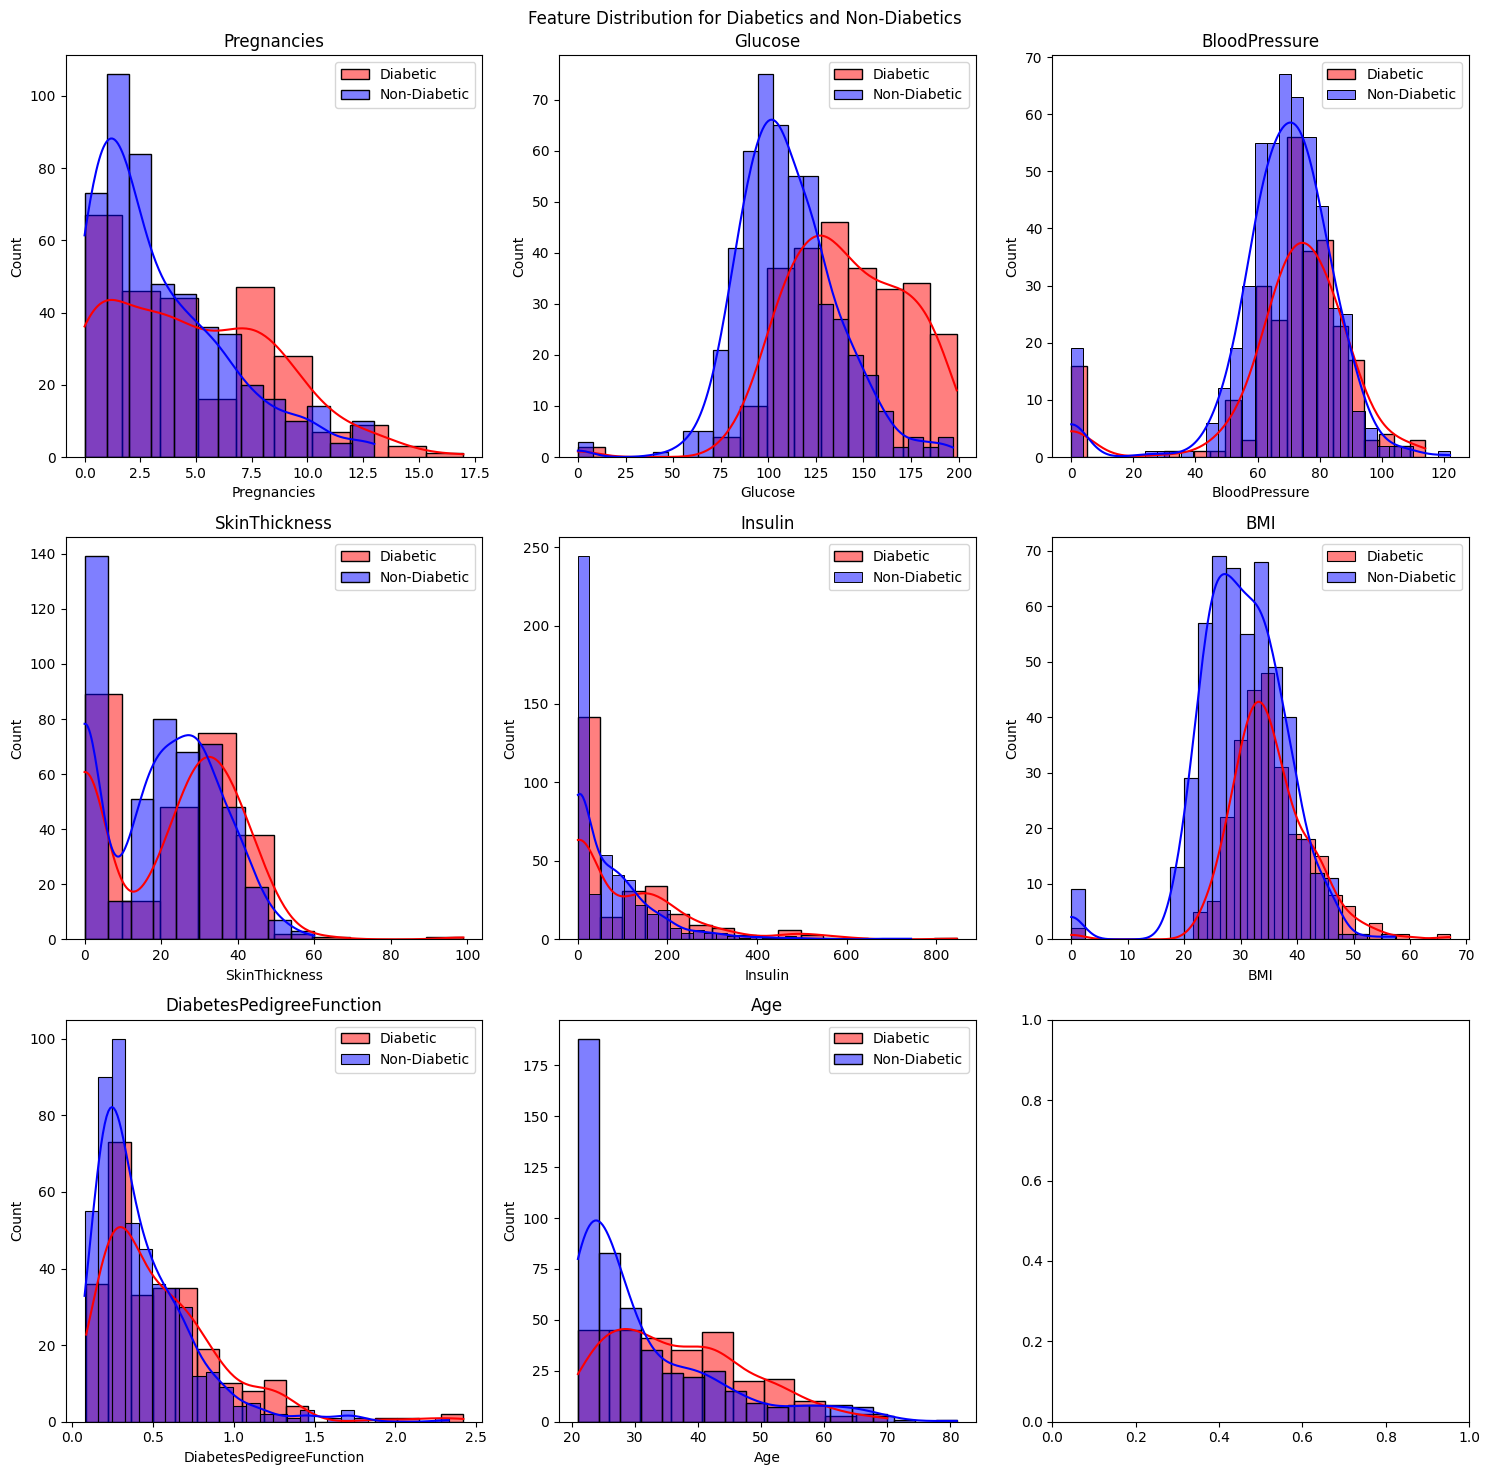

In [ ]:
#seperate data into diabetic and non-diabetic
diabetic=data[data['Outcome']==1]
non_diabetic=data[data['Outcome']==0]
print(diabetic)
# Plot histograms for each feature
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Feature Distribution for Diabetics and Non-Diabetics')
features = data.columns[:-1]
for i, feature in enumerate(features):
    sns.histplot(diabetic[feature], color='red', label='Diabetic', kde=True, ax=axes[i//3, i%3])
    sns.histplot(non_diabetic[feature], color='blue', label='Non-Diabetic', kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(feature)
    axes[i//3, i%3].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [ ]:
# Calculate the correlation matrix manually
def manual_corr_matrix(df):
    corr_matrix = np.corrcoef(df.values.T)
    return pd.DataFrame(data=corr_matrix, index=df.columns, columns=df.columns)

correlation_matrix = manual_corr_matrix(data.drop('Outcome', axis=1))


# Heatmap

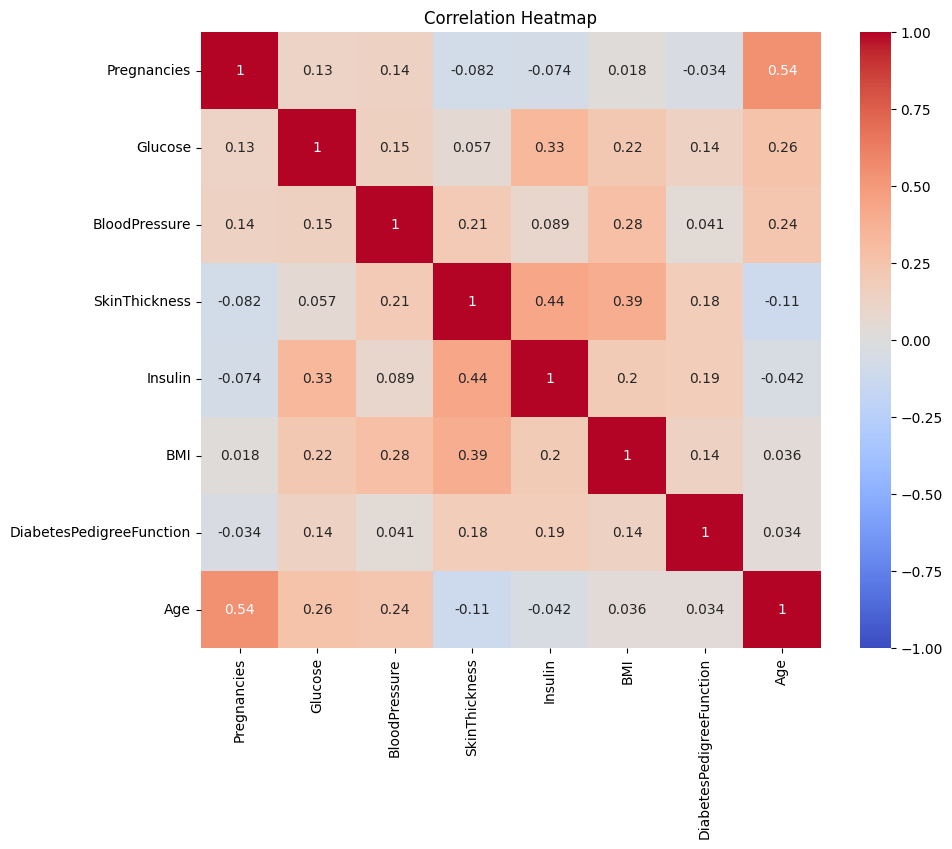

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# 10-data
here 10 random data from the dataset and is used to predict using logistic regression Model.


In [ ]:
#Take 10-sample data from the dataset and use

sample_data = data.sample(10, random_state=24)

# Function to classify based on threshold value 0.5
def classify(sample):
    return (sample >= 0.5).astype(int)

# Apply classification function to the sample data
predictions = classify(sample_data['Outcome'])

# Display the sample data and predictions
print(sample_data)
print('Predictions:', predictions)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
313            3      113             50             10       85  29.5   
99             1      122             90             51      220  49.7   
550            1      116             70             28        0  27.4   
334            1       95             60             18       58  23.9   
211            0      147             85             54        0  42.8   
704            4      110             76             20      100  28.4   
255            1      113             64             35        0  33.6   
619            0      119              0              0        0  32.4   
345            8      126             88             36      108  38.5   
718            1      108             60             46      178  35.5   

     DiabetesPedigreeFunction  Age  Outcome  
313                     0.626   25        0  
99                      0.325   31        1  
550                     0.204   21        0  
3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#training and testing of data
X=data.drop('Outcome',axis=1)
y=data['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model=LogisticRegression(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.7402597402597403
Confusion Matrix:
 [[121  30]
 [ 30  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
